# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(study_results, mouse_metadata, how='left', on= ['Mouse ID', 'Mouse ID'])


# Display the data table for preview
mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Checking the number of mice.
mousecount = mouse_data['Mouse ID'].nunique()
mousecount

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_df = mouse_data.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='count')
mouse_dupes = grouped_df[grouped_df['count'] >1]['Mouse ID'].unique()
mouse_dupes

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_data = mouse_data[mouse_data['Mouse ID'].isin(mouse_dupes)]
dupe_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data[~mouse_data['Mouse ID'].isin(mouse_dupes)]
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
# Checking the number of mice in the clean DataFrame.
clean_mousecount = clean_mouse_data['Mouse ID'].nunique()
clean_mousecount

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

data_by_regimen = mouse_data.groupby('Drug Regimen')

tv_mean = data_by_regimen['Tumor Volume (mm3)'].mean()
tv_median = data_by_regimen['Tumor Volume (mm3)'].median()
tv_var = data_by_regimen['Tumor Volume (mm3)'].var()
tv_std = data_by_regimen['Tumor Volume (mm3)'].std()
tv_sem = data_by_regimen['Tumor Volume (mm3)'].sem()

tv_stats = pd.DataFrame({
    'Mean Tumor Volume': tv_mean,
    'Median Tumor Volume': tv_median,
    'Tumor Volume Variance': tv_var,
    'Tumor Volume Standard Deviation': tv_std,
    'Tumor Volume SEM': tv_sem

})

tv_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_tv_stats = data_by_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_tv_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

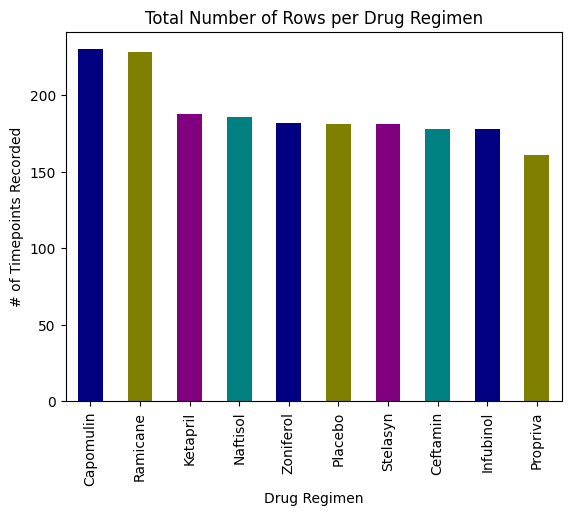

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data_by_regimen_counted = data_by_regimen.count()
sorted_counts = data_by_regimen_counted.sort_values(by='Mouse ID', ascending=False)

colors = ['navy', 'olive', 'purple', 'teal']
sorted_counts['Mouse ID'].plot(kind='bar', color=colors, title='Total Number of Rows per Drug Regimen')
plt.ylabel('# of Timepoints Recorded')
plt.show()


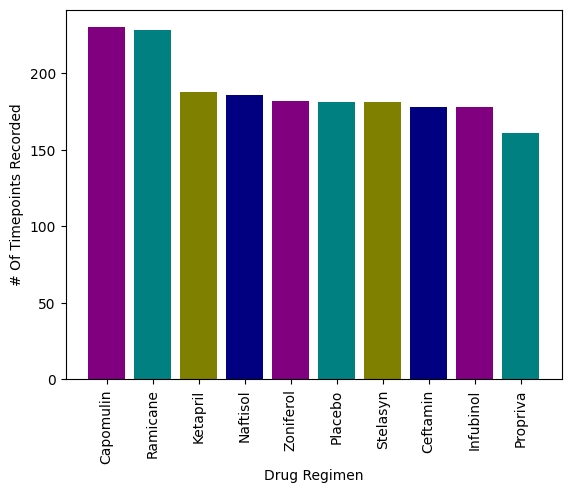

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_names = sorted_counts.index
regimen_counts = sorted_counts['Mouse ID'].values
colors = ['purple', 'teal', 'olive', 'navy']

plt.bar(regimen_names, regimen_counts, color=colors)
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Timepoints Recorded')
plt.xticks(rotation=90)

plt.show()

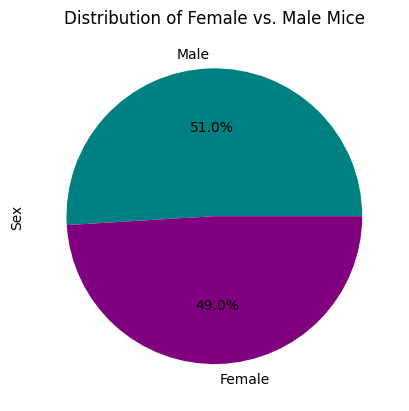

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_mouse_data['Sex'].value_counts()

sex_distribution.plot(kind='pie', title='Distribution of Female vs. Male Mice', colors=['teal', 'purple'], autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

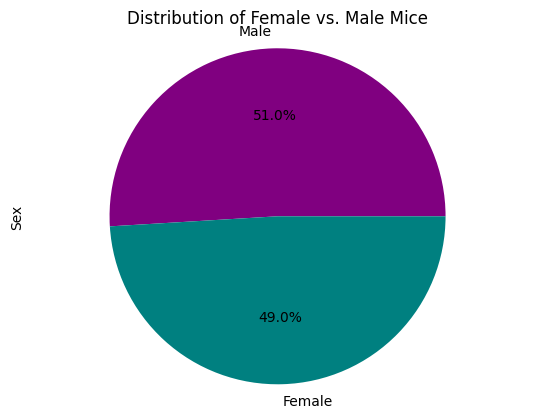

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
sizes = [sex_distribution['Male'], sex_distribution['Female']]
colors = ['purple', 'teal']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%')
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')
plt.axis('equal')
plt.show

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_mouse_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_volume_data = pd.merge(last_timepoint, clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='left')
final_volume_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

vol_data_list = []

for treatment in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes

    volume_data_filtered_by_drug = final_volume_data.loc[final_volume_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    vol_data_list.append(volume_data_filtered_by_drug)
                                        
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume_data_filtered_by_drug.quantile([.25, .50, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = volume_data_filtered_by_drug.loc[(volume_data_filtered_by_drug < lower_bound) | (volume_data_filtered_by_drug > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers.tolist()}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


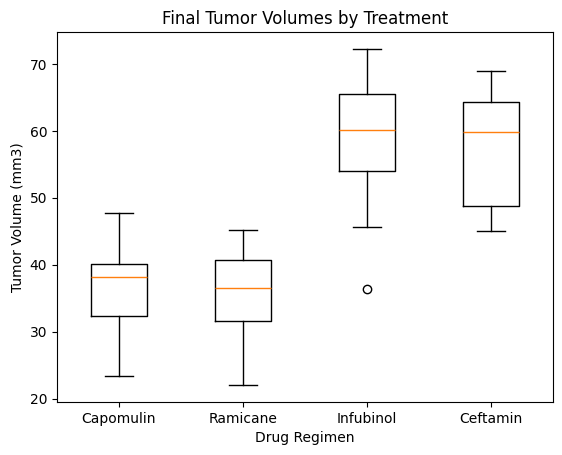

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes by Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(vol_data_list, labels=treatment_list)
plt.show()


## Line and Scatter Plots

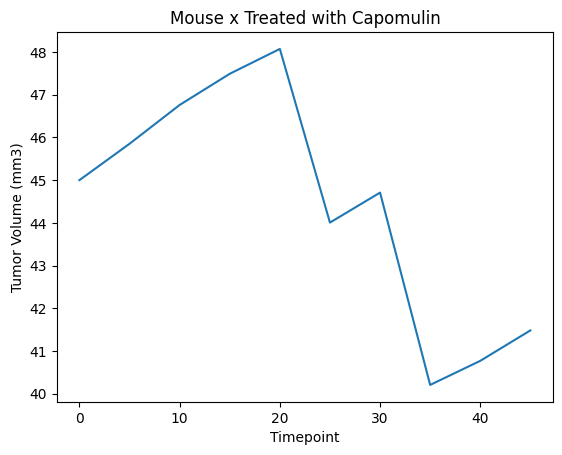

In [56]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin




# Capomulin filter
#cap_data = final_volume_data[final_volume_data['Drug Regimen'] == 'Capomulin']
cap_data_all_timepoints = mouse_data[mouse_data['Drug Regimen'] == 'Capomulin']

# Single mouse
single_mouse_data_all_timepoints = cap_data_all_timepoints[cap_data_all_timepoints['Mouse ID'] == 'l509']

#Create the line plot
plt.plot(single_mouse_data_all_timepoints['Timepoint'], single_mouse_data_all_timepoints['Tumor Volume (mm3)'])

# Add title and labels
plt.title('Mouse x Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [35]:
cap_data.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22
80,i557,45,47.685963,1,Capomulin,Female,1,24
83,i738,45,37.311846,2,Capomulin,Female,23,20
85,j119,45,38.125164,1,Capomulin,Female,7,23
87,j246,35,38.753265,1,Capomulin,Female,21,21
108,l509,45,41.483008,3,Capomulin,Male,17,21


In [46]:
single_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
108,l509,45,41.483008,3,Capomulin,Male,17,21


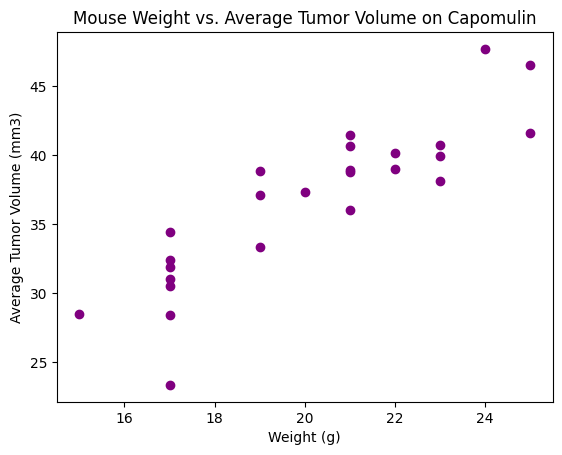

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

grouped_cap_data = cap_data.groupby('Mouse ID')[['Tumor Volume (mm3)', 'Weight (g)']].mean()


plt.scatter(grouped_cap_data['Weight (g)'], grouped_cap_data['Tumor Volume (mm3)'], color='purple')
plt.title('Mouse Weight vs. Average Tumor Volume on Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
